# Model Training

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

import warnings

In [2]:
df = pd.read_csv('../data/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Preparing X and Y variables

In [3]:
X = df.drop(columns=['output'],axis=1)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
y = df['output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

## Feature Transformation

In [5]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns
numerical_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Extract numerical features
X_numerical = X[numerical_columns]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical features
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Convert the scaled numerical features back to a DataFrame
X_numerical_scaled_df = pd.DataFrame(X_numerical_scaled, columns=numerical_columns)

# Concatenate the scaled numerical features with the remaining non-numerical features
X_transformed = pd.concat([X_numerical_scaled_df, X.drop(columns=numerical_columns)], axis=1)

## Feature Selection

In [6]:

# separate dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((242, 13), (61, 13))

In [7]:
# Create an Evaluate Function to give all metrics after model Training
# Create Evaluate Function
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = mean_squared_error(true, predicted, squared=False)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [8]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Train and evaluate models
model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3491
- Mean Absolute Error: 0.2840
- R2 Score: 0.5078
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3410
- Mean Absolute Error: 0.2668
- R2 Score: 0.5338


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4975
- Mean Absolute Error: 0.4951
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5000
- Mean Absolute Error: 0.4976
- R2 Score: -0.0025


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3491
- Mean Absolute Error: 0.2842
- R2 Score: 0.5077
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3405
- Mean Absolute Error: 0.2663
- R2 Score: 0.5351


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3125
- Mean Absolute Error: 0.2091
- R2 Score: 0.6054
----------------------

In [9]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.535052
0,Linear Regression,0.533789
3,K-Neighbors Regressor,0.513578
5,Random Forest Regressor,0.497144
6,XGBRegressor,0.434921
7,AdaBoost Regressor,0.384531
4,Decision Tree,0.342672
1,Lasso,-0.002505


### Ridge regression

In [10]:
# Initialize the Ridge regression model
ridge_model = Ridge()

# Fit the model using the training data
ridge_model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = ridge_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Model Evaluation:")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")
print("Accuracy of the model is %.2f" %r2)

Ridge Regression Model Evaluation:
Root Mean Squared Error: 0.3405
Mean Absolute Error: 0.2663
R2 Score: 0.5351
Accuracy of the model is 0.54


### Plot y_pred and y_test

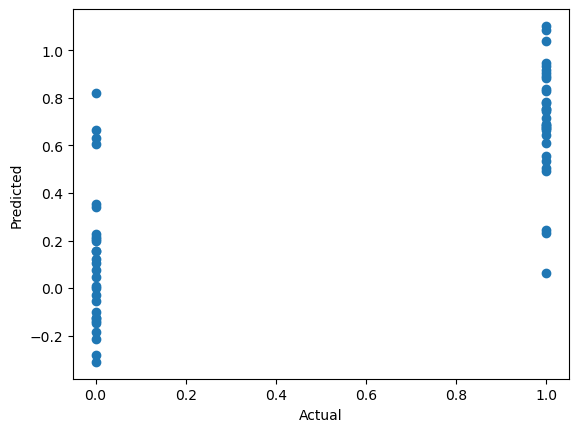

In [11]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

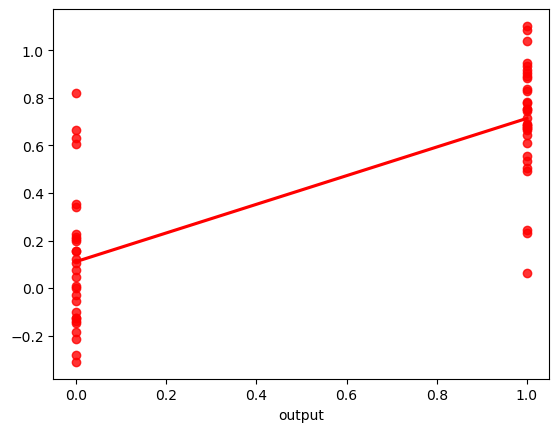

In [12]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### Difference between Actual and Predicted Values

In [13]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# DataFrame
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
})

# Display the DataFrame
print(pred_df)

     Actual Value  Predicted Value  Difference
179             0         0.208472   -0.208472
228             0         0.633161   -0.633161
111             1         0.716808    0.283192
246             0         0.046194   -0.046194
60              1         0.933468    0.066532
9               1         0.828054    0.171946
119             1         0.554001    0.445999
223             0        -0.310882    0.310882
268             0        -0.124695    0.124695
33              1         0.505558    0.494442
5               1         0.673198    0.326802
101             1         0.230375    0.769625
45              1         0.836067    0.163933
175             0         0.103452   -0.103452
118             1         1.103145   -0.103145
46              1         0.904962    0.095038
125             1         1.084557   -0.084557
192             0         0.212945   -0.212945
285             0        -0.138346    0.138346
279             0        -0.027965    0.027965
152          